In [29]:
import numpy as np 
import pandas as pd
pd.options.display.max_columns = None

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import folium 

# 데이터 불러오기

In [30]:
df = pd.read_csv('./pharmacy.csv', encoding = 'CP949')
df.head(5)

,NO,약국명,대표전화,주소,월요일 운영,화요일 운영,수요일 운영,목요일 운영,금요일 운영,토요일 운영,일요일 운영,공휴일 운영
0,1,진메디칼약국,02-400-9240,"서울특별시 송파구 마천로57길 3, 1층 (마천동)",09:00~20:00,09:00~20:00,09:00~20:00,09:00~20:00,09:00~20:00,09:00~18:00,-,-
1,2,아현종로약국,02-313-3400,"서울특별시 마포구 굴레방로9길 2, 1층 (아현동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~17:00,-,-
2,3,연세우리약국,02-2293-1339,"서울특별시 성동구 왕십리로 296-1, 조흥은행 (행당동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~19:00,09:00~13:00,09:00~21:00,09:00~21:00
3,4,아이사랑약국,02-802-1007,서울특별시 금천구 시흥대로 214 401호,09:00~21:00,09:00~21:00,09:00~21:00,09:00~18:00,09:00~21:00,09:00~17:00,10:00~16:00,-
4,5,경일약국,02-802-9104,"서울특별시 금천구 시흥대로72길 32, (시흥동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,-,-


In [31]:
# 컬럼명 변경 '도로명주소'로 변경해야 geocoding하기 수월함
df.columns = ['No', 'Name', 'PhoneNumber', '도로명주소', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday', 'Holyday']

In [32]:
df.head(5)

,No,Name,PhoneNumber,도로명주소,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holyday
0,1,진메디칼약국,02-400-9240,"서울특별시 송파구 마천로57길 3, 1층 (마천동)",09:00~20:00,09:00~20:00,09:00~20:00,09:00~20:00,09:00~20:00,09:00~18:00,-,-
1,2,아현종로약국,02-313-3400,"서울특별시 마포구 굴레방로9길 2, 1층 (아현동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~17:00,-,-
2,3,연세우리약국,02-2293-1339,"서울특별시 성동구 왕십리로 296-1, 조흥은행 (행당동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~19:00,09:00~13:00,09:00~21:00,09:00~21:00
3,4,아이사랑약국,02-802-1007,서울특별시 금천구 시흥대로 214 401호,09:00~21:00,09:00~21:00,09:00~21:00,09:00~18:00,09:00~21:00,09:00~17:00,10:00~16:00,-
4,5,경일약국,02-802-9104,"서울특별시 금천구 시흥대로72길 32, (시흥동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,-,-


In [33]:
df.shape

(4929, 12)

# 서울 중부(은평구, 종로구, 서대문구, 마포구, 용산구, 중구) 데이터만 필터링

In [34]:
df_middle = df[df['도로명주소'].str.contains("은평구|종로구|서대문구|마포구|용산구|중구")]
df_middle.head()

,No,Name,PhoneNumber,도로명주소,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holyday
1,2,아현종로약국,02-313-3400,"서울특별시 마포구 굴레방로9길 2, 1층 (아현동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~17:00,-,-
9,10,솔약국,02-355-5304,"서울특별시 은평구 진관4로 77, 702동 113호 (진관동, 은평뉴타운상림마을)",09:00~19:00,09:00~20:00,09:00~13:00,09:00~19:00,09:00~19:00,09:00~17:00,-,-
17,18,셀약국,02-337-7959,"서울특별시 마포구 양화로 72, 1층 118호 (서교동)",09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,21:00~25:00,22:00~25:00
23,24,봄햇살약국,02-358-1773,서울특별시 은평구 통일로 833(대조동),09:00~19:00,09:00~19:00,09:00~19:00,09:00~19:00,09:00~19:00,09:00~16:00,-,-
24,25,위드팜삼정바로약국,02-738-8511,"서울특별시 종로구 경교장길 35, 3152,3153,3154호 (평동, 경희궁자이 ...",08:30~18:00,08:30~18:00,08:30~18:00,08:30~18:00,08:30~18:00,08:30~13:00,-,-


In [35]:
df_middle.shape

(984, 12)

# 서울 중부 데이터 중 일/공휴일 오픈 약국 데이터 가져오기

In [36]:
# 일/공휴일 영업 시간이 있는 데이터만 가져오기 위해서 -를 NaN으로 변환한 뒤 작업
df_middle = df_middle.replace('-', np.NaN)

# 일/공휴일 중 영업하지 않는 약국은 drop
df_middle = df_middle.dropna()

In [37]:
df_middle.head(50)

,No,Name,PhoneNumber,도로명주소,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holyday
17,18,셀약국,02-337-7959,"서울특별시 마포구 양화로 72, 1층 118호 (서교동)",09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,21:00~25:00,22:00~25:00
61,62,파랑새약국,02-743-7735,"서울특별시 종로구 대학로 121, 1호, 2호 (명륜4가)",08:30~22:50,08:30~22:50,08:30~22:50,08:30~22:50,08:30~22:50,08:30~22:50,14:00~22:50,14:00~22:50
163,164,파인약국,02-336-3301,"서울특별시 서대문구 신촌로 65, 1층 (창천동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,13:00~21:00,13:00~21:00
228,229,모범약국,02-372-9139,"서울특별시 서대문구 증가로 129, (남가좌동)",09:00~22:00,09:00~22:00,09:00~22:00,09:00~22:00,09:00~22:00,08:30~22:00,14:00~22:00,15:00~21:30
229,230,가까운약국,02-356-9813,"서울특별시 은평구 통일로 738, 1층 3호 (불광동)",08:50~23:00,08:50~22:00,08:50~23:00,08:50~22:00,08:50~23:00,08:50~22:00,13:00~22:00,09:30~22:00
230,231,비온뒤숲속약국,02-332-3250,"서울특별시 마포구 월드컵로 111, (망원동)",08:30~25:00,08:30~25:00,08:30~25:00,08:30~25:00,08:30~25:00,08:30~25:00,09:00~25:00,10:00~25:00
276,277,망원시장약국,02-790-7527,"서울특별시 마포구 월드컵로13길 56, 1층 (망원동)",08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,10:00~22:30,08:30~22:30,10:00~22:30
313,314,매일여는약국,02-2132-8365,"서울특별시 마포구 월드컵북로 396, 누리꿈스퀘어 B1094호 (상암동)",09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00
333,334,남시약국,02-753-7466,서울특별시 중구 남대문로 18 (남대문로3가),08:00~19:00,08:00~19:00,08:00~19:00,08:00~19:00,08:00~19:00,08:00~19:00,09:00~18:00,09:00~18:00
496,497,장수약국,02-2252-2929,서울특별시 중구 퇴계로86길 6 (신당동),08:00~21:00,08:00~20:00,08:00~21:00,08:00~20:00,08:00~20:00,08:00~20:00,09:00~17:00,09:00~17:00


In [38]:
df_middle.shape

(104, 12)

In [39]:
df_middle.to_csv('df_middle.csv', encoding = 'CP949')

# 도로명 주소로 위도 경도 가져오기 NaverAPI geocoding

In [40]:
loc_list = df_middle['도로명주소']

loc_list.to_excel('loc_list.xlsx', encoding = 'CP949', index = False)

In [41]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
from urllib import parse
from urllib.request import Request
from urllib.error import HTTPError
from bs4 import BeautifulSoup
import json

# NAVER API
client_id = 'lfw941nmxn'
client_pw = 'GdtcHp2VGMA9PiAJYM89Rmp9qFDglJrdxuckviLF'

api_url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='

# 주소 목록 파일 (.xlsx)
data = pd.read_excel('loc_list.xlsx')

# 네이버 지도 API 이용해서 위경도 찾기
geo_coordi = []     
for add in data['도로명주소']:
    add_urlenc = parse.quote(add)  
    url = api_url + add_urlenc
    request = Request(url)
    request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
    request.add_header('X-NCP-APIGW-API-KEY', client_pw)
    try:
        response = urlopen(request)
    except HTTPError as e:
        print('HTTP Error!')
        latitude = None
        longitude = None
    else:
        rescode = response.getcode()
        if rescode == 200:
            response_body = response.read().decode('utf-8')
            response_body = json.loads(response_body)   # json
            if response_body['addresses'] == [] :
                print("'result' not exist!")
                latitude = None
                longitude = None
            else:
                latitude = response_body['addresses'][0]['y']
                longitude = response_body['addresses'][0]['x']
                print("Success!")
        else:
            print('Response error code : %d' % rescode)
            latitude = None
            longitude = None

    geo_coordi.append([latitude, longitude])


np_geo_coordi = np.array(geo_coordi)
pd_geo_coordi = pd.DataFrame({"도로명": data['도로명주소'].values,
                              "위도": np_geo_coordi[:, 0],
                              "경도": np_geo_coordi[:, 1]})

pd_geo_coordi.to_csv('location.csv', encoding = 'CP949')


Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!
Success!


In [42]:
location_df = pd.read_csv('./location.csv', encoding = 'CP949')

# 36번째 주소가 위도, 경도 변환이 안되어있음 -> 네이버 지도 상에 검색해도 안나오는 곳이라서 그런듯 (세계약국)
location_df = location_df.dropna()

location_df.head(10)

,Unnamed: 0,도로명,위도,경도
0,0,"서울특별시 마포구 양화로 72, 1층 118호 (서교동)",37.550802,126.916716
1,1,"서울특별시 종로구 대학로 121, 1호, 2호 (명륜4가)",37.582051,127.001609
2,2,"서울특별시 서대문구 신촌로 65, 1층 (창천동)",37.556457,126.933806
3,3,"서울특별시 서대문구 증가로 129, (남가좌동)",37.577282,126.923266
4,4,"서울특별시 은평구 통일로 738, 1층 3호 (불광동)",37.611424,126.929422
5,5,"서울특별시 마포구 월드컵로 111, (망원동)",37.558185,126.907840
6,6,"서울특별시 마포구 월드컵로13길 56, 1층 (망원동)",37.555375,126.907039
7,7,"서울특별시 마포구 월드컵북로 396, 누리꿈스퀘어 B1094호 (상암동)",37.579342,126.889819
8,8,서울특별시 중구 남대문로 18 (남대문로3가),37.560768,126.977742
9,9,서울특별시 중구 퇴계로86길 6 (신당동),37.565274,127.019613


In [43]:
location_df.shape

(104, 4)

In [44]:
# 약국 이름과 geocoding을 통해 얻은 위도, 경도를 리스트로 변환 
name = df_middle['Name'].tolist()
X = location_df['위도'].tolist()
Y = location_df['경도'].tolist()

In [45]:
# 3개의 리스트를 합치기
data = list(zip(name,X,Y))

In [46]:
data

[('셀약국', 37.5508021, 126.9167159),
 ('파랑새약국', 37.5820514, 127.0016089),
 ('파인약국', 37.556457, 126.9338058),
 ('모범약국', 37.577282, 126.9232657),
 ('가까운약국', 37.6114242, 126.9294218),
 ('비온뒤숲속약국', 37.5581853, 126.9078399),
 ('망원시장약국', 37.5553754, 126.9070387),
 ('매일여는약국', 37.5793419, 126.889819),
 ('남시약국', 37.5607683, 126.9777422),
 ('장수약국', 37.5652743, 127.0196128),
 ('연신종로약국', 37.6203711, 126.9249783),
 ('365구생약국', 37.6112565, 126.928754),
 ('수복약국', 37.5392582, 126.9575158),
 ('합정녹십자약국', 37.5482359, 126.9157764),
 ('은평마리약국', 37.6057305, 126.9157455),
 ('옵티마유한약국', 37.5703092, 126.9034459),
 ('합정365약국', 37.548427, 126.914912),
 ('365미소약국', 37.6394039, 126.9182748),
 ('온유약국', 37.5712072, 127.0005649),
 ('피크약국', 37.5508044, 126.9150557),
 ('신효창프라자약국', 37.5395912, 126.9610873),
 ('서울중앙약국', 37.5491188, 126.9704827),
 ('다산온누리약국', 37.5558768, 127.0109786),
 ('열린약국', 37.5707113, 127.0003589),
 ('유한약국', 37.5707848, 127.0034135),
 ('새삼성약국', 37.5607633, 126.9776222),
 ('평화약국', 37.5602437, 126.9771106

In [47]:
# 반복문을 사용하여 지도에 마크를 여러개 표시해야 함 -> 데이터 프레임을 사용하면 편리함
col_name = 'NAEM','X','Y'
data = pd.DataFrame(data, columns = col_name)

In [48]:
data.head()

,NAEM,X,Y
0,셀약국,37.550802,126.916716
1,파랑새약국,37.582051,127.001609
2,파인약국,37.556457,126.933806
3,모범약국,37.577282,126.923266
4,가까운약국,37.611424,126.929422


# 지도 그리기

In [49]:
# 서울시 위도, 경도
center = [37.5585942, 126.9608813]

# location은 위치 의미하고 []에 위도와 경도를 넣는다.
# zoom_start는 처음 지도를 봤을 때 확대 정도를 의미함.
g_map = folium.Map(location = center, zoom_start = 12)

g_map 

In [50]:
for i in range(len(data)):
    marker = folium.Marker([data.loc[i]['X'], data.loc[i]['Y']], # 마커를 찍는 과정 -> 리스트 안에 [위도,경도]를 넣어줌
                          popup=data.loc[i]['NAEM'], # 마커의 이름 -> NAME 컬럼을 사용
                          icon = folium.Icon(color='red')) # 색상 및 아이콘을 다양하게 변경할 수 있음

    marker.add_to(g_map) # 마커를 만들어둔 map에 add

g_map # map을 프린트

In [51]:
g_map.save('seoul_middle_pharmacy.html')

# 시간에 따른 시각화

In [57]:
df_middle.head()

,No,Name,PhoneNumber,도로명주소,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holyday
17,18,셀약국,02-337-7959,"서울특별시 마포구 양화로 72, 1층 118호 (서교동)",09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,21:00~25:00,22:00~25:00
61,62,파랑새약국,02-743-7735,"서울특별시 종로구 대학로 121, 1호, 2호 (명륜4가)",08:30~22:50,08:30~22:50,08:30~22:50,08:30~22:50,08:30~22:50,08:30~22:50,14:00~22:50,14:00~22:50
163,164,파인약국,02-336-3301,"서울특별시 서대문구 신촌로 65, 1층 (창천동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,13:00~21:00,13:00~21:00
228,229,모범약국,02-372-9139,"서울특별시 서대문구 증가로 129, (남가좌동)",09:00~22:00,09:00~22:00,09:00~22:00,09:00~22:00,09:00~22:00,08:30~22:00,14:00~22:00,15:00~21:30
229,230,가까운약국,02-356-9813,"서울특별시 은평구 통일로 738, 1층 3호 (불광동)",08:50~23:00,08:50~22:00,08:50~23:00,08:50~22:00,08:50~23:00,08:50~22:00,13:00~22:00,09:30~22:00


In [58]:
df_middle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 17 to 4848
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   No           104 non-null    int64 
 1   Name         104 non-null    object
 2   PhoneNumber  104 non-null    object
 3   도로명주소        104 non-null    object
 4   Monday       104 non-null    object
 5   Tuesday      104 non-null    object
 6   Wednesday    104 non-null    object
 7   Thursday     104 non-null    object
 8   Friday       104 non-null    object
 9   Saturday     104 non-null    object
 10  Sunday       104 non-null    object
 11  Holyday      104 non-null    object
dtypes: int64(1), object(11)
memory usage: 10.6+ KB


In [82]:
# 컬럼의 값을 "~"기준으로 자른뒤 변수에 저장
sat_split = df_middle["Saturday"].str.split("~")
sun_split = df_middle["Sunday"].str.split("~")
hol_split = df_middle["Holyday"].str.split("~")

In [84]:
# str.get(0) -> 자른 후 첫번째(왼쪽) 값 (1) -> 두번째(오른쪽) 값
df_middle["SatOpen"] = sat_split.str.get(0)
df_middle["SatClose"] = sat_split.str.get(1)

df_middle["SunOpen"] = sun_split.str.get(0)
df_middle["SunClose"] = sun_split.str.get(1)

df_middle["HolOpen"] = hol_split.str.get(0)
df_middle["HolClose"] = hol_split.str.get(1)

In [96]:
df_middle.head(40)

,No,Name,PhoneNumber,도로명주소,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Holyday,SatOpen,SatClose,SunOpen,SunClose,HolOpen,HolClose
17,18,셀약국,02-337-7959,"서울특별시 마포구 양화로 72, 1층 118호 (서교동)",09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,09:00~25:00,21:00~25:00,22:00~25:00,09:00,25:00,21:00,25:00,22:00,25:00
61,62,파랑새약국,02-743-7735,"서울특별시 종로구 대학로 121, 1호, 2호 (명륜4가)",08:30~22:50,08:30~22:50,08:30~22:50,08:30~22:50,08:30~22:50,08:30~22:50,14:00~22:50,14:00~22:50,08:30,22:50,14:00,22:50,14:00,22:50
163,164,파인약국,02-336-3301,"서울특별시 서대문구 신촌로 65, 1층 (창천동)",09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,09:00~21:00,13:00~21:00,13:00~21:00,09:00,21:00,13:00,21:00,13:00,21:00
228,229,모범약국,02-372-9139,"서울특별시 서대문구 증가로 129, (남가좌동)",09:00~22:00,09:00~22:00,09:00~22:00,09:00~22:00,09:00~22:00,08:30~22:00,14:00~22:00,15:00~21:30,08:30,22:00,14:00,22:00,15:00,21:30
229,230,가까운약국,02-356-9813,"서울특별시 은평구 통일로 738, 1층 3호 (불광동)",08:50~23:00,08:50~22:00,08:50~23:00,08:50~22:00,08:50~23:00,08:50~22:00,13:00~22:00,09:30~22:00,08:50,22:00,13:00,22:00,09:30,22:00
230,231,비온뒤숲속약국,02-332-3250,"서울특별시 마포구 월드컵로 111, (망원동)",08:30~25:00,08:30~25:00,08:30~25:00,08:30~25:00,08:30~25:00,08:30~25:00,09:00~25:00,10:00~25:00,08:30,25:00,09:00,25:00,10:00,25:00
276,277,망원시장약국,02-790-7527,"서울특별시 마포구 월드컵로13길 56, 1층 (망원동)",08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,08:30~22:30,10:00~22:30,08:30~22:30,10:00~22:30,10:00,22:30,08:30,22:30,10:00,22:30
313,314,매일여는약국,02-2132-8365,"서울특별시 마포구 월드컵북로 396, 누리꿈스퀘어 B1094호 (상암동)",09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00,09:00~24:00,09:00,24:00,09:00,24:00,09:00,24:00
333,334,남시약국,02-753-7466,서울특별시 중구 남대문로 18 (남대문로3가),08:00~19:00,08:00~19:00,08:00~19:00,08:00~19:00,08:00~19:00,08:00~19:00,09:00~18:00,09:00~18:00,08:00,19:00,09:00,18:00,09:00,18:00
496,497,장수약국,02-2252-2929,서울특별시 중구 퇴계로86길 6 (신당동),08:00~21:00,08:00~20:00,08:00~21:00,08:00~20:00,08:00~20:00,08:00~20:00,09:00~17:00,09:00~17:00,08:00,20:00,09:00,17:00,09:00,17:00


# Seaborn의 jointplot을 이용하여 그래프 그리기

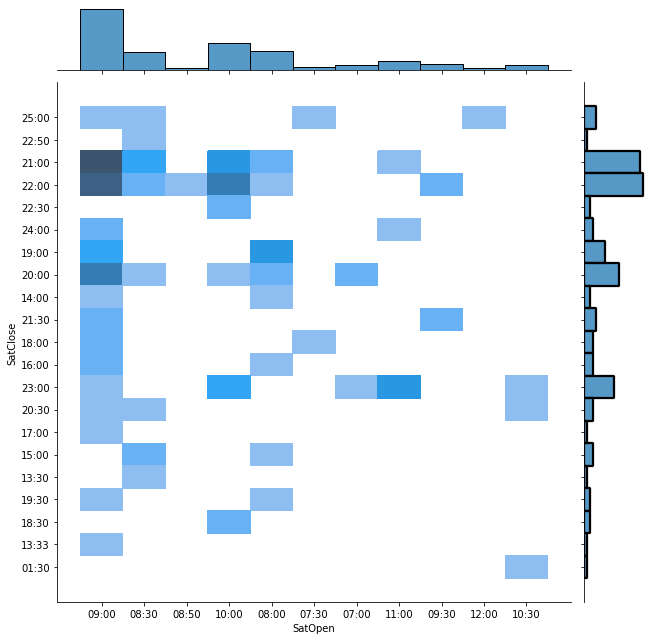

In [95]:
sns.jointplot(x=df_middle['SatOpen'], y = df_middle['SatClose'], height=9,ratio=7, kind='hist')

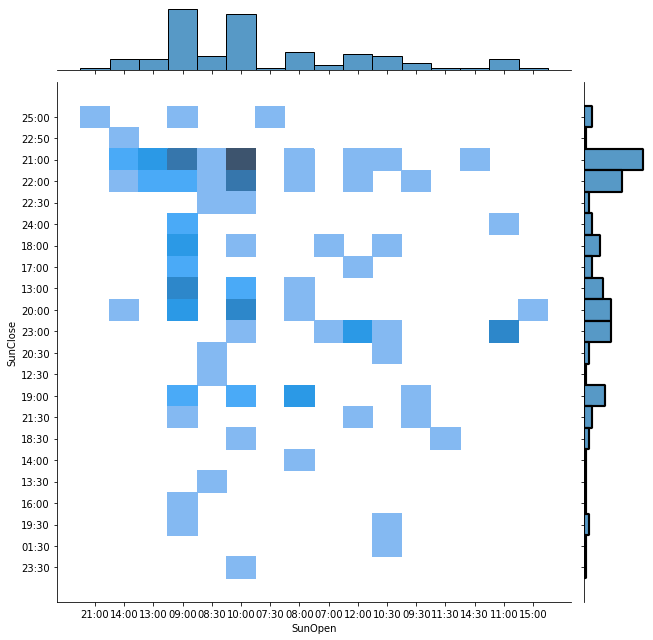

In [94]:
sns.jointplot(x=df_middle['SunOpen'], y = df_middle['SunClose'], height=9,ratio=7, kind='hist')

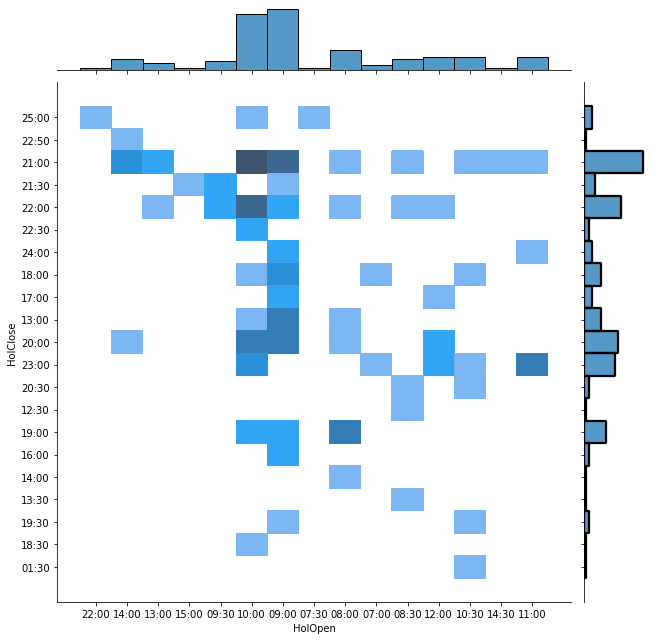

In [93]:
sns.jointplot(x=df_middle['HolOpen'], y = df_middle['HolClose'], height=9,ratio=7, kind='hist')